# Observações

Os códigos devem está comentados deixando claro para que serve cada função ou trecho de código usado.

Além disso, é importante explicitar o raciocínio por trás da construção da resposta, deixando evidente as justificativas para a escolha das funções, representações, simplificações, manipulações e etc, utilizadas.


# Questão 1

Um reator contínuo de tanque agitado, também chamado de CSTR (continuous stirred-tank reactor), é um tipo de reator ideal e comum em engenharia química e modelado através de balanços de massa e energia.

Dada uma reação A → B exotérmica realizada em um CSTR que possui uma camisa por onde passa um fluído refrigerante, através dos balanços de massa energia obtém-se a seguinte representação:
\begin{align}
\begin{cases}
\frac{dC*A(t)}{dt} = -k_0 \cdot C_A(t) \cdot e^{-E_R/T(t)} + \frac{Q_f(t) \cdot C*{Af} - Q \cdot C*A(t)}{a \cdot h(t)} \\
\frac{dT(t)}{dt} = \frac{-k_0 \cdot C_A(t) \cdot \Delta H \cdot e^{-E_R/T(t)}}{\rho C_p} + \frac{Q_f \cdot T_f - Q \cdot T(t)}{a \cdot h(t)} + \frac{U*{a*c} \cdot (T_c(t) - T(t))}{\rho C_p \cdot a \cdot h(t)} \\
\frac{dT_c(t)}{dt} = \frac{Q_c \cdot (T*{cf} - T*c(t))}{V_c} + \frac{U*{a*c} \cdot (T(t) - T_c(t))}{\rho C*{pc} \cdot V_c} \\
\frac{dh(t)}{dt} = \frac{Q_f(t) - Q}{a}
\end{cases}
\end{align}

onde: $a$ = 0.1666 m$^2$, $V_c$ = 0.01 m$^3$, $U_{a_c}$ = 5$\times$10$^4$ J/(min$\cdot$K), $\rho C_p$ = 2.39$\times$10$^5$ J/(m$^3 \cdot $K), $\rho C_{pc}$ = 4.175$\times$10$^6$ J/(m$^3 \cdot $K) \), $k_0$ = 7.2$\times$10$^{10}$ min$^{-1}$, $E_R$ = 8750 K, $\Delta H$ = -5$\times$10$^4$ J/mol, $Q$ = 0.1 m$^3$/min, $C_{Af}$ = 1000 mol/m$^3$, $T_f$ = 320 K, $Q_c$ = 0.015 m$^3$/min, $T_{cf}$ = 300 K, $0 \leq h(t) \leq 2.0$m


## Item 1.1

Avalie o estacionário do sistema para um valor de vazão de alimentação $Q_f(0) = 0.1$ m$^3$/min e $h(0)$ = 1.0 m. Em seguida, simule o comportamento do reator no intervalo de 0 ≤ t ≤ 50 min, aplicando um degrau na vazão de alimentação
$Q_f(t) = \begin{cases}
0.1 & t < 5 \text{ min} \\
0.11 & t \geq 5 \text{ min}
\end{cases}$,
sabendo que o sistema parte do estado estacionário.

Apresente os gráficos de concentração do reagente $C_A(t)$, temperatura interna do reator $T(t)$, temperatura da camisa $T_c(t)$ e nível no interior do CSTR $h(t)$ e discuta os resultados


### Importando bibliotecas e definindo as constantes


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

a = 0.1666  # m^2
Vc = 0.01  # m^3
Uac = 5e4  # J/(min⋅K)
rhoCp = 2.39e5  # J/(m^3⋅K)
rhoCpc = 4.175e6  # J/(m^3⋅K)
k0 = 7.2e10  # min^-1
ER = 8750  # K
dH = -5e4  # J/mol
CAf = 1000  # mol/m^3
Tf = 320  # K
Qc = 0.015  # m^3/min
Tcf = 300  # K

### Avaliando o estado estacionário do sistema

O estado estacionário é o estado em que todas as derivadas são zero. Sendo assim, podemos resolver o sistema de equações diferenciais como um sistema de equações comuns, utilizando a função fsolve.


In [22]:
# Definindo o sistema de equações para achar a raiz.
def sistema(Y, Qf, Q):
    CA, T, Tc = Y

    # Se h(0) = 1 e dhdt = 0 desdo começo. Então h é constante e não varia.
    h = 1 # m

    dCAdt = -k0 * CA * np.exp(-ER / T) + Qf * CAf / (a * h) - Q * CA / (a * h)
    dTdt = (
        (-k0 * CA * dH * np.exp(-ER / T)) / (rhoCp)
        + (Qf * Tf - Q * T) / (a * h)
        + (Uac * (Tc - T)) / (rhoCp * a * h)
    )
    dTcdt = Qc * (Tcf - Tc) / Vc + Uac * (T - Tc) / (rhoCpc * Vc)
    # A quarta equação do sistema não é necessária para esse cálculo, pois aqui ela é constante.
    # Perceba que Se Qf é igual a 0.1 que é igual a Q, a derivada de h sempre será zero. Portanto
    # h não varia. E se h(0) é 1, então h sempre será 1.
    # dhdt = (Qf - Q) / a
    return [dCAdt, dTdt, dTcdt]

# dhdt = (Qf - Q) / a
# No estado estacionário dhdt = 0.
# Como Q = 0.1, Qf precisa ser 0.1 também, para todos os valores de t.
# Portanto podemos fixar o valor de Qf e Q.
Q = 0.1 # m^3/min
Qf = 0.1 # m^3/min

# Resolver o sistema utilizando a função fsolve
Y0 = [20, 400, 350]  # Estimativas iniciais
Y_etc = fsolve(sistema, Y0, args=(Qf, Q))

# Extração dos valores no estado estacionário
CA_etc = Y_etc[0]
T_etc = Y_etc[1]
Tc_etc = Y_etc[2]
h_etc = 1  # h(0) = 1, mas como a derivada é zero, ele sempre será 1

# Valores de estado estacionário
print("Solução do sistema:")
print(f"  CA_etc: {CA_etc}")
print(f"  T_etc: {T_etc}")
print(f"  Tc_etc: {Tc_etc}")
print(f"  h_etc: {h_etc}")

# Conferindo se o cálculo do estado estacionário foi correto
# Os valores dentro do array precisam ser próximos de zero
print("Teste da solução do sistema:", sistema(Y_etc, Qf, Q))

Solução do sistema:
  CA_etc: 20.86863190620163
  T_etc: 403.9342951805787
  Tc_etc: 346.1417514675155
  h_etc: 1
Teste da solução do sistema: [1.7340795466225245e-11, -3.623767952376511e-12, 1.4210854715202004e-14]


### Simulando o comportamento do reator


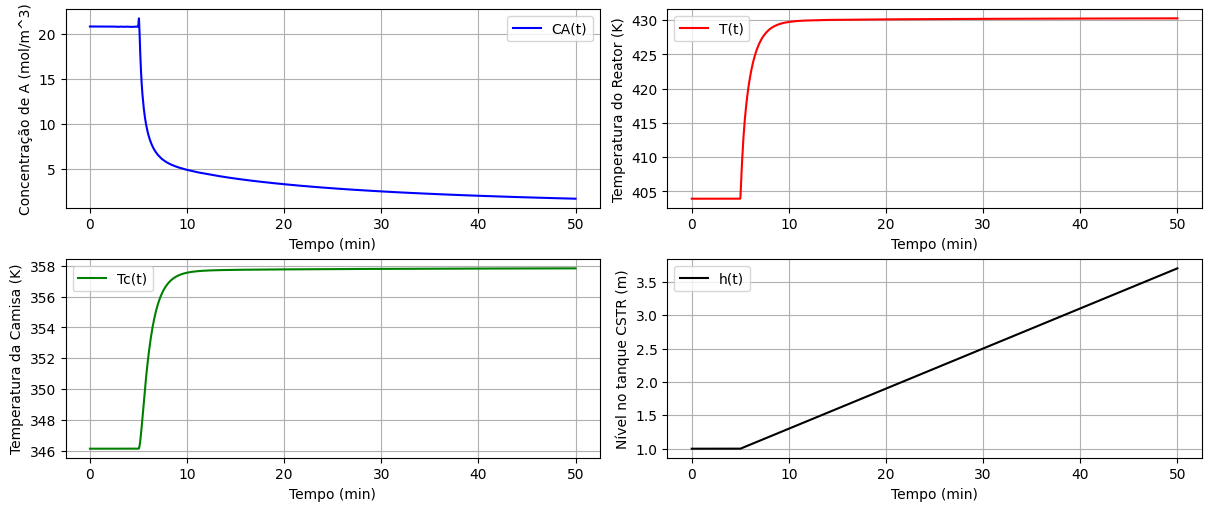

In [23]:
# Definido o sistema de Equações diferenciais
def Tanque(t, y, Qf_func, Q_func):
    CA, T, Tc, h = y

    Qf = Qf_func(t)
    Q = Q_func(t, h)

    dCAdt = -k0 * CA * np.exp(-ER / T) + Qf * CAf / (a * h) - Q * CA / (a * h)
    dTdt = (
        -k0 * CA * dH * np.exp(-ER / T) / (rhoCp)
        + (Qf * Tf - Q * T) / (a * h)
        + Uac * (Tc - T) / (rhoCp * a * h)
    )
    dTcdt = Qc * (Tcf - Tc) / Vc + Uac * (T - Tc) / (rhoCpc * Vc)
    dhdt = (Qf - Q) / a
    return [dCAdt, dTdt, dTcdt, dhdt]


# Definido a função de vazão de alimentação Qf(t)
def Qf_degrau(t):
    return 0.1 if t < 5 else 0.11


# Definindo a função de vazão de descarga Q(t)
def Q_func(t, h):
    return Q  # m^3/min


# Resolver o sistema com as condições iniciais (valores do estado estacionário) e utilizando Qf_degrau como função de vazão de alimentação
Y = solve_ivp(Tanque, [0, 50], [CA_etc, T_etc, Tc_etc, h_etc], args=(Qf_degrau, Q_func))


# Plotagem dos resultados (criei uma função, porque vamos reutilizar esse código depois.)
def plot_Y(Y):
    # Extração dos valores
    t = Y.t
    CA = Y.y[0]
    T = Y.y[1]
    Tc = Y.y[2]
    h = Y.y[3]

    fig, axs = plt.subplots(2, 2, figsize=(12, 5), layout="constrained")

    axs[0, 0].plot(t, CA, "b-", label="CA(t)")
    axs[0, 0].set_ylabel("Concentração de A (mol/m^3)")
    axs[0, 0].set_xlabel("Tempo (min)")
    axs[0, 0].legend()
    axs[0, 0].grid()

    axs[0, 1].plot(t, T, "r-", label="T(t)")
    axs[0, 1].set_ylabel("Temperatura do Reator (K)")
    axs[0, 1].set_xlabel("Tempo (min)")
    axs[0, 1].legend()
    axs[0, 1].grid()

    axs[1, 0].plot(t, Tc, "g-", label="Tc(t)")
    axs[1, 0].set_ylabel("Temperatura da Camisa (K)")
    axs[1, 0].set_xlabel("Tempo (min)")
    axs[1, 0].legend()
    axs[1, 0].grid()

    axs[1, 1].plot(t, h, "k-", label="h(t)")
    axs[1, 1].set_ylabel("Nível no tanque CSTR (m)")
    axs[1, 1].set_xlabel("Tempo (min)")
    axs[1, 1].legend()
    axs[1, 1].grid()

    plt.show()

# Plotando os gráficos
plot_Y(Y)

Antes de t=5, o valor de Qf é igual a 0.1, o mesmo valor que estava durante o calculo dos valores do sistema estacionário, portanto todos os gráficos continuam estáveis. Entretanto, após t=5, a vazão aumenta, o que faz a concentração de A cair e as temperaturas aumentarem (O que faz sentido pois a reação é exotérmica). Mas o nível do tanque começa a subir, fazendo com que ele transborde (indo acima de 2 metros).


## Item 1.2

Para garantir melhor estabilidade do processo e evitar que o nível do tanque $(h(t))$ seque ou transborde é adicionado um controlador cujo o objetivo é manter o nível em um valor desejado (Sp = 1.0 m) manipulando a vazão de descarga $Q(t)$.

O Controlador em questão é o famoso proporcional-integral, representado pela seguinte equação:

\begin{align}
e(t) &= Sp - h(t)\\
Q(t) &= Q(0) + P\left(e(t) + I\int_0^{t} e(t) \right)
\end{align}
onde, $Q(0)$ = 0.1 m$^3$/min, $P$ = -1/6 m$^2$, $I$ = 1.0 min$^{-1}$

Simule o CSTR com o controlador de nível e apresente os gráficos de concentração do reagente $C_A(t)$, temperatura interna do reator $T(t)$, temperatura da camisa $T_c(t)$ e nível no interior do CSTR $h(t)$, comparando com os resultados encontrados no item anterior.


### Adicionando o controlador


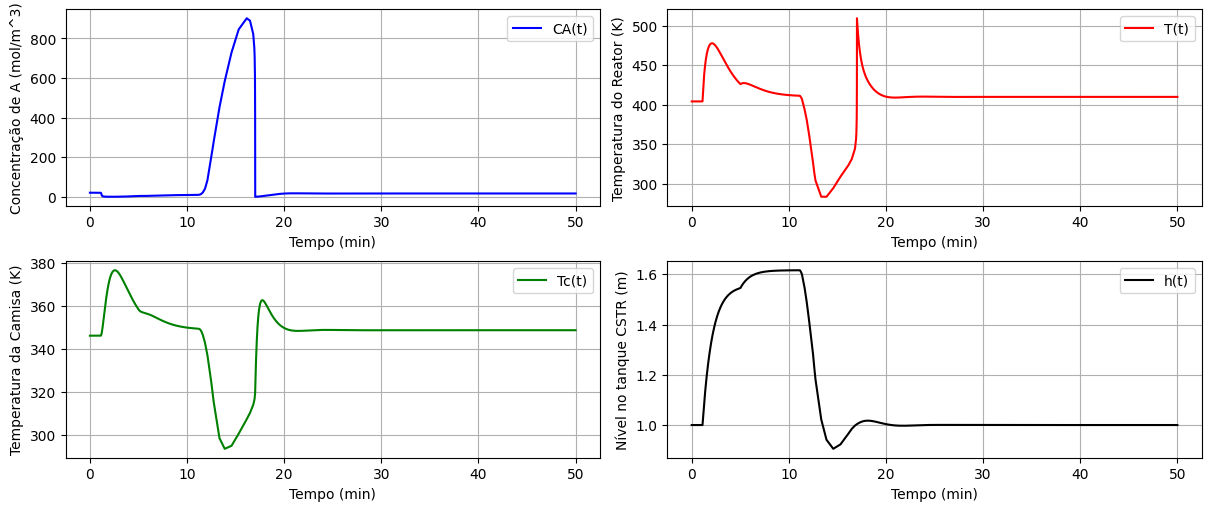

In [24]:
# Constantes
Sp = 1  # m
Q0 = 0.1  # m^3/min
P = -1 / 6  # m^2
I = 1  # min^-1


def área_trapézio(B, b, h):
    """Calcula a área de um trapézio com base maior B, base menor b e altura h"""
    return ((B + b) * h) / 2


def erro(h):
    """
    Função e(t). Aqui, em vez de passar o t como argumento,
    estamos passando o valor de h(t) (nível no tanque) diretamente.
    """
    return Sp - h


t_anterior = 0
e_anterior = 0
integral_e = 0

def Q_controlador(t, h):
    """Função Q(t), com o controlador proporcional-integral."""

    # Dando acesso as variáveis globais
    global t_anterior
    global e_anterior
    global integral_e

    e = erro(h)

    # Durante a execução do solve_ivp, ele pode ocasionalmente voltar no tempo
    # em vez de só avançar. O que bagunçaria completamente o calculo da integral.
    # Esse if impede isso que a integral seja calculada quando o solve_ivp retroceder no valor de t.
    if t > t_anterior:
        # A integral de e(t) de 0 a t pode ser aproximado somando pequenos trapézios
        integral_e += área_trapézio(e_anterior, e, t - t_anterior)

        t_anterior = t
        e_anterior = e

    return Q0 + P * (e + I * (integral_e)) # Equação do controlador proporcional integral


Y = solve_ivp(
    Tanque,
    [0, 50],
    [CA_etc, T_etc, Tc_etc, h_etc],
    args=(
        Qf_degrau,
        Q_controlador,
    ),
)

# Plotando os gráficos
plot_Y(Y)